In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()
data = pd.read_csv("Housing.csv")

binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for columns in binary_columns:
    data[columns] = data[columns].apply(lambda x: 1 if x == 'yes' else 0)
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']

X = data[features].to_numpy(dtype=float) ## selects only the specific columns relevant
y = data['price'].to_numpy(dtype=float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=14)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Saving Housing.csv to Housing.csv


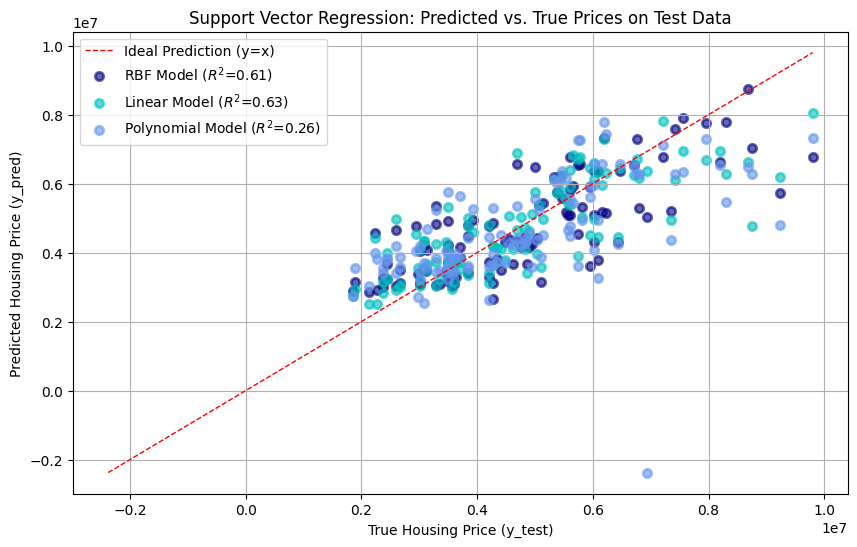

In [ ]:
svr_rbf = SVR(kernel='rbf', C=1e7, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e7)
svr_poly = SVR(kernel='poly', C=1e7, degree=2)

# Fit models on the training data
svr_rbf.fit(X_train_scaled, y_train)
svr_lin.fit(X_train_scaled, y_train)
svr_poly.fit(X_train_scaled, y_train)

# Predict on the test data
y_rbf_pred = svr_rbf.predict(X_test_scaled)
y_lin_pred = svr_lin.predict(X_test_scaled)
y_poly_pred = svr_poly.predict(X_test_scaled)

r2_rbf = r2_score(y_test, y_rbf_pred)
r2_lin = r2_score(y_test, y_lin_pred)
r2_poly = r2_score(y_test, y_poly_pred)

lw = 2
plt.figure(figsize=(10, 6))

##Determine plot limits for the ideal line
y_all = np.concatenate([y_test, y_rbf_pred, y_lin_pred, y_poly_pred])
y_min = y_all.min()
y_max = y_all.max()

 ##Plot the ideal prediction line (y=x)
plt.plot([y_min, y_max], [y_min, y_max], color='red', lw=1, linestyle='--', label='Ideal Prediction (y=x)') ## forces the line to be diagonal

plt.scatter(y_test, y_rbf_pred, color='navy', lw=lw, label=f'RBF Model ($R^2$={r2_rbf:.2f})', alpha=0.6)
plt.scatter(y_test, y_lin_pred, color='c', lw=lw, label=f'Linear Model ($R^2$={r2_lin:.2f})', alpha=0.6)
plt.scatter(y_test, y_poly_pred, color='cornflowerblue', lw=lw, label=f'Polynomial Model ($R^2$={r2_poly:.2f})', alpha=0.6)

plt.xlabel('True Housing Price (y_test)')
plt.ylabel('Predicted Housing Price (y_pred)')
plt.title('Support Vector Regression: Predicted vs. True Prices on Test Data')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
ridge_reg = Ridge(alpha = 1.00)
ridge_reg.fit(X_train_scaled, y_train)
y_ridge_pred = ridge_reg.predict(X_test_scaled)
r2_ridge = r2_score(y_test, y_ridge_pred)

print("\n--- Comparative Model Performance ---")
print(f"Ridge Regression (HW2 with Regularization) R^2: {r2_ridge:.4f}")


--- Comparative Model Performance ---
Ridge Regression (HW2 with Regularization) R^2: 0.6439
